In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
# Charger les donnees
df = pd.read_csv("../data/data-recensement.csv")
df.head()

,Region,Departement,COM_ARRT_VILLE,COMMUNE,QUARTIER_VILLAGE_HAMEAU,CONCESSION,MENAGE,HOMMES,FEMMES,POPULATION
0,DAKAR,DAKAR,GOREE,GOREE,MBAMBARA,41,53,137,147,284
1,DAKAR,DAKAR,GOREE,GOREE,PONTY,57,95,340,361,701
2,DAKAR,DAKAR,GOREE,GOREE,TONGHOR,37,83,185,182,367
3,DAKAR,DAKAR,GOREE,GOREE,CASTEL,35,59,180,159,339
4,DAKAR,DAKAR,VILLE DE DAKAR,DAKAR PLATEAU,CITE CAP VERDIENNE,56,180,408,371,779


In [7]:
# Verifier les types desdonnees
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25224 entries, 0 to 25223
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Region                   25224 non-null  object
 1   Departement              25224 non-null  object
 2   COM_ARRT_VILLE           25224 non-null  object
 3   COMMUNE                  25224 non-null  object
 4   QUARTIER_VILLAGE_HAMEAU  25224 non-null  object
 5   CONCESSION               25224 non-null  int64 
 6   MENAGE                   25224 non-null  int64 
 7   HOMMES                   25224 non-null  int64 
 8   FEMMES                   25224 non-null  int64 
 9   POPULATION               25224 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB
None


In [9]:
# Verifier les valeurs manquantes
print(df.isnull().sum())

Region                     0
Departement                0
COM_ARRT_VILLE             0
COMMUNE                    0
QUARTIER_VILLAGE_HAMEAU    0
CONCESSION                 0
MENAGE                     0
HOMMES                     0
FEMMES                     0
POPULATION                 0
dtype: int64


In [12]:
#Statistics
print(df.describe())

         CONCESSION        MENAGE        HOMMES        FEMMES     POPULATION
count  25224.000000  25224.000000  25224.000000  25224.000000   25224.000000
mean      56.212734     81.662504    363.895338    354.721456     718.616794
std      204.596737    259.822143   1158.618672   1178.790322    2334.954010
min        1.000000      1.000000      0.000000      0.000000       1.000000
25%        7.000000     10.000000     51.000000     48.000000     100.000000
50%       16.000000     22.000000    121.000000    115.000000     237.000000
75%       41.000000     57.000000    304.000000    298.000000     600.000000
max    11687.000000  12369.000000  69700.000000  70909.000000  140609.000000


In [21]:
# Verifier le nom des colonnes
print(df.columns)

Index(['Region', 'Departement', 'COM_ARRT_VILLE', 'COMMUNE',
       'QUARTIER_VILLAGE_HAMEAU', 'CONCESSION', 'MENAGE', 'HOMMES', 'FEMMES',
       'POPULATION'],
      dtype='object')


In [23]:
# Agréger la population par région (si ce n'est pas déjà fait)
df_region = df.groupby("Region")["POPULATION"].sum().reset_index()
df_region

,Region,POPULATION
0,DAKAR,4004425
1,DIOURBEL,2080332
2,FATICK,906922
3,KAFFRINE,820404
4,KAOLACK,1336718
5,KEDOUGOU,245147
6,KOLDA,914797
7,LOUGA,1125910
8,MATAM,831632
9,SAINT-LOUIS,1202438


In [26]:
# Trier les régions par population
df_region = df_region.sort_values(by="POPULATION", ascending=False)
df_region

,Region,POPULATION
0,DAKAR,4004425
12,THIES,2463679
1,DIOURBEL,2080332
4,KAOLACK,1336718
9,SAINT-LOUIS,1202438
7,LOUGA,1125910
11,TAMBACOUNDA,987154
6,KOLDA,914797
2,FATICK,906922
8,MATAM,831632


C:\Users\Mouha\AppData\Local\Temp\ipykernel_26108\3286735593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_region, x = "POPULATION", y = "Region", palette= "Blues_r")


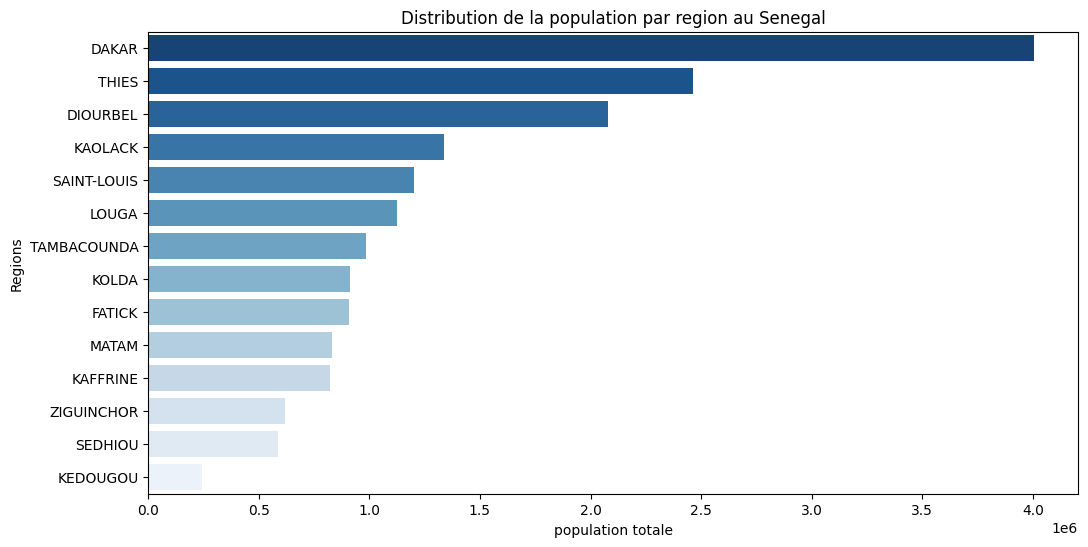

In [29]:
# Visualisation
plt.figure(figsize = (12, 6))
sns.barplot(data = df_region, x = "POPULATION", y = "Region", palette= "Blues_r")
plt.xlabel("population totale")
plt.ylabel("Regions")
plt.title("Distribution de la population par region au Senegal")
plt.show()


In [35]:
df_sexe = df.groupby("Region")[["HOMMES", 'FEMMES']].sum().reset_index()
df_sexe

,Region,HOMMES,FEMMES
0,DAKAR,2018759,1985666
1,DIOURBEL,1029751,1050581
2,FATICK,453865,453057
3,KAFFRINE,415883,404521
4,KAOLACK,674910,661808
5,KEDOUGOU,132257,112890
6,KOLDA,467910,446887
7,LOUGA,563945,561965
8,MATAM,428109,403523
9,SAINT-LOUIS,610884,591554


<Figure size 1200x600 with 0 Axes>

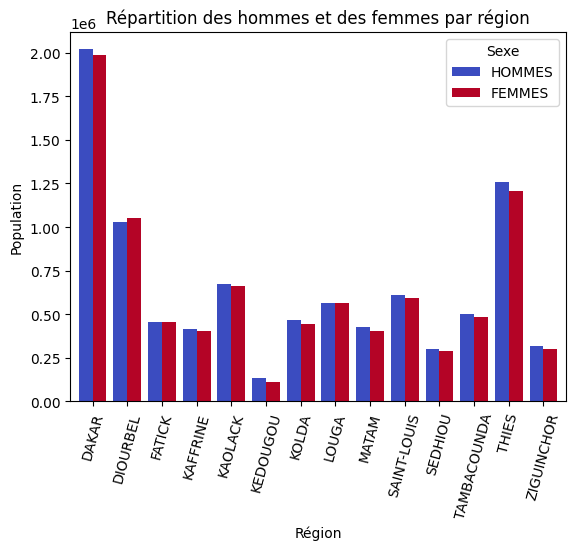

In [48]:
# Création du graphique
plt.figure(figsize=(12, 6))
df_sexe.set_index("Region").plot(kind="bar", stacked=False, colormap="coolwarm", width=0.8)


# Ajouter un titre et des labels
plt.xlabel("Région")
plt.ylabel("Population")
plt.title("Répartition des hommes et des femmes par région")
plt.xticks(rotation=75)  # Incline les noms des régions pour une meilleure lisibilité
plt.legend(title="Sexe")

# Afficher le graphique
plt.show()